In [1]:
import tensorflow as tf
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))
print("GPU Details:", tf.config.list_physical_devices('GPU'))


Num GPUs Available: 1
GPU Details: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
import pandas as pd
import numpy as np

In [3]:
df_train = pd.read_csv(r"D:\my notebook\customer-review\train.csv")
df_test = pd.read_csv(r"D:\my notebook\customer-review\test.csv")

In [4]:
df_train['label'].value_counts()

label
1    1800000
0    1800000
Name: count, dtype: int64

In [5]:
df_test["label"].value_counts(0)

label
1    200000
0    200000
Name: count, dtype: int64

In [6]:

sample_size_train = 15000  
sample_size_test = 5000  


df_reduce_train = df_train.groupby("label", group_keys=False).apply(lambda x: x.sample(sample_size_train, random_state=42))
df_reduce_test = df_test.groupby("label", group_keys=False).apply(lambda x: x.sample(sample_size_test, random_state=42))

print(df_reduce_train['label'].value_counts())
print(df_reduce_test['label'].value_counts())


label
0    15000
1    15000
Name: count, dtype: int64
label
0    5000
1    5000
Name: count, dtype: int64


C:\Users\sahil\AppData\Local\Temp\ipykernel_21028\2374727220.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_reduce_train = df_train.groupby("label", group_keys=False).apply(lambda x: x.sample(sample_size_train, random_state=42))
C:\Users\sahil\AppData\Local\Temp\ipykernel_21028\2374727220.py:6: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_reduce_test = df_test.groupby("label", group_keys=False).apply(lamb

In [7]:
df_reduce_train.head()

,label,title,content
3250608,0,The History of Torture and Execution,I have not yet received the book ordered even ...
3328921,0,Stainless Steel shouldn't corrode... should it?,We were really pleased when we first received ...
233979,0,Another Weak Sequel To A Once Promising Franchise,Hellraiser: Heatseeker is a film that I wanted...
1373704,0,Simply Awful,"Contrived, trite, ""Bridget Jones's Diary"" wann..."
955003,0,FLASH,"Jeff Beck's Flash In my opinion, was not one o..."


In [8]:
df_reduce_train["Text"] = df_reduce_train["title"] + " " + df_reduce_train["content"]
df_reduce_test["Text"] = df_reduce_test["title"] + " " + df_reduce_test["content"]

In [9]:
df_reduce_train.drop(["title" , "content"] , axis=1, inplace = True)
df_reduce_test.drop(["title" , "content"] , axis=1, inplace = True)

In [10]:
df_reduce_train.head()

,label,Text
3250608,0,The History of Torture and Execution I have no...
3328921,0,Stainless Steel shouldn't corrode... should it...
233979,0,Another Weak Sequel To A Once Promising Franch...
1373704,0,"Simply Awful Contrived, trite, ""Bridget Jones'..."
955003,0,"FLASH Jeff Beck's Flash In my opinion, was not..."


In [11]:
df_reduce_test.head()

,label,Text
240275,0,Buyer beware-- too good to be true I bought th...
145967,0,Returned to Amazon After reading some great re...
316913,0,Poor quality Bungee cord ripped first time I u...
132310,0,Too basic The book title is misleading. I thou...
60873,0,Warranty? This product lasted 14 months for me...


In [12]:
x_train = df_reduce_train["Text"].tolist()
y_train = df_reduce_train["label"].tolist()

In [13]:
x_test = df_reduce_test["Text"].tolist()
y_test = df_reduce_test["label"].tolist()

In [14]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

In [15]:
stopword = set(stopwords.words("english"))
ps = PorterStemmer()

In [16]:
def clean_text_list(text_list):
    cleaned = []
    for text in text_list:
        text = str(text)
        review = re.sub("[^a-zA-Z0-9]" , " ", text)
        review = review.lower()
        review = review.split()

        words = [ps.stem(word) for word in review if word not in stopword]
        review = " ".join(words)
        cleaned.append(review)
    return cleaned

cleaned_x_train = clean_text_list(x_train)
cleaned_x_test = clean_text_list(x_test)

In [17]:
# clean_text(x)

In [18]:
cleaned_x_train[0]

'histori tortur execut yet receiv book order even though paid rather high price unabl get respons seller begin think may someth less reput jame j ebyr zero star'

In [19]:
cleaned_x_test[0]

'buyer bewar good true bought tricycl son almost three love hazard ride front wheel attach secur plastic part hold togeth either defect poorli design write letter compani complain also plastic white part front wheel fall whenev hit small bump sidewalk price seem good true realli save money better qualiti'

In [20]:
from tensorflow.keras.preprocessing.text import one_hot

In [21]:
voc_size = 500

In [22]:
onehot_repo_train = [one_hot(words , voc_size) for words in cleaned_x_train]
onehot_repo_test = [one_hot(words , voc_size) for words in cleaned_x_test]

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense , LSTM , Embedding , Dropout

In [25]:
a_train = 0
for i in range(len(cleaned_x_train)):
    if len(cleaned_x_train[i]) >a_train:
        a_train = len(cleaned_x_train[i])
        print(a_train, i )

159 0
364 1
510 20
609 38
616 488
885 1090


In [26]:
a_test = 0
for i in range(len(cleaned_x_test)):
    if len(cleaned_x_test[i]) >a_test:
        a_test = len(cleaned_x_test[i])
        print(a_test, i )

304 0
493 1
545 10
580 137
595 612
596 630
600 671
604 725
608 1699
630 1920
659 3895
791 5163


In [27]:
set_len = 900


In [28]:
emb_doc_train = pad_sequences(onehot_repo_train , maxlen=set_len , padding="pre")
emb_doc_test = pad_sequences(onehot_repo_test , maxlen=set_len , padding="pre")

In [29]:
x_train_final = np.array(emb_doc_train)
y_train_final = np.array(y_train)

x_test_final = np.array(emb_doc_test)
y_test_final = np.array(y_test)

In [30]:
y_train_final

array([0, 0, 0, ..., 1, 1, 1])

In [31]:
dim =100

In [32]:
model = Sequential()
model.add(Embedding(voc_size , dim , input_length=set_len))
model.add(LSTM(100))
model.add(Dropout(0.5))
model.add(Dense(1,activation="sigmoid"))

In [33]:
model.compile(optimizer="adam" , loss="binary_crossentropy" , metrics=["accuracy"])

In [34]:
model.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x00000233D77873D0>>

In [36]:
model.fit(x_train_final , y_train_final , validation_data=(x_test_final,y_test_final) , epochs=10)

Epoch 1/10
938/938 [==============================] - 103s 109ms/step - loss: 0.3640 - accuracy: 0.8351 - val_loss: 0.5092 - val_accuracy: 0.7658
Epoch 2/10
938/938 [==============================] - 75s 80ms/step - loss: 0.3518 - accuracy: 0.8422 - val_loss: 0.5097 - val_accuracy: 0.7612
Epoch 3/10
938/938 [==============================] - 74s 78ms/step - loss: 0.3331 - accuracy: 0.8500 - val_loss: 0.5610 - val_accuracy: 0.7642
Epoch 4/10
938/938 [==============================] - 74s 79ms/step - loss: 0.3179 - accuracy: 0.8585 - val_loss: 0.5764 - val_accuracy: 0.7609
Epoch 5/10
938/938 [==============================] - 74s 78ms/step - loss: 0.3015 - accuracy: 0.8653 - val_loss: 0.5827 - val_accuracy: 0.7588
Epoch 6/10
938/938 [==============================] - 75s 80ms/step - loss: 0.2817 - accuracy: 0.8760 - val_loss: 0.6252 - val_accuracy: 0.7589
Epoch 7/10
938/938 [==============================] - 74s 79ms/step - loss: 0.2662 - accuracy: 0.8856 - val_loss: 0.6756 - val_accurac

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [38]:
y_pred = model.predict(x_test_final)
y_pred

313/313 [==============================] - 10s 31ms/step


array([[0.04646746],
       [0.02020993],
       [0.04190178],
       ...,
       [0.9755466 ],
       [0.99942565],
       [0.9997552 ]], dtype=float32)

In [39]:
y_pred = (y_pred >= 0.5).astype(int)

In [40]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [41]:
cm = confusion_matrix(y_test_final , y_pred)

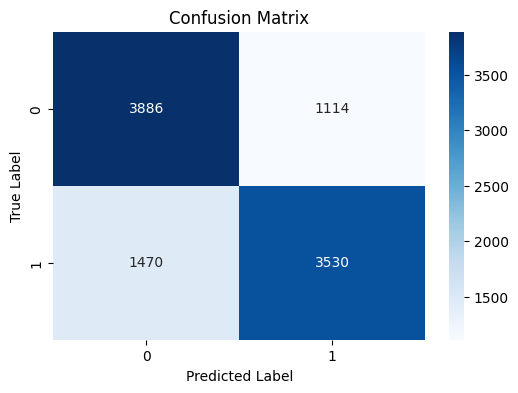

In [42]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [44]:
model.save("sentiment_model.h5")